In [85]:
# 0) Логическое "ИЛИ" (пример из методички)
from numpy import exp, random, dot, around, array


class artificial_neuron:
    # bias - смещение
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def activate(self, inputs):
        weightened_sum = dot(inputs, self.weights) + self.bias
        # вычисление сигмоидальной функции активации, которая
        # вне зависимости от значения взешеной функции (аргумента)
        # позволяет получать на выходе значение от 0 до 1
        return 1 / (1 + exp(-weightened_sum))

    def print_weights(self):
        print("weights: ", end='')
        print(self.weights)
        print("bias: ", end='')
        print(self.bias)

    def train(self, inputs, target_output, learning_rate):
        output = self.activate(inputs)
        # error - величина ошибки
        error = target_output - output
        # gradient - производная сигмоидальной функции активации
        gradient = output * (1 - output)
        # learning_rate - параметр градиентных алгоритмов обучения
        # нейронныйх сетей позволяющий управлять величиной корекции
        # весов на каждой итерации [на практике подбирается экспериментально]
        delta_weights = learning_rate * error * gradient * inputs
        self.weights += delta_weights
        self.bias += learning_rate * error * gradient


# случайным образом задаем начальные веса
weights = random.rand(2)
bias = random.rand()

# входные данные и ожидаемый результат для логического ИЛИ
inputs = array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_outputs = array([0, 1, 1, 1])

# создаем нейрон
neuron = artificial_neuron(weights, bias)

# обучаем сеть
# задаем шаг коректировки весов
w_learn_rate = 0.1
for m in range(5000):
    for n in range(len(inputs)):
        neuron.train(inputs[n], target_outputs[n], w_learn_rate)

# выводим значения весов
# neuron.print_weights()

# тестируем работу нейрона
rows = list()
for i in range(len(inputs)):
    output = neuron.activate(inputs[i])
    input = str(inputs[i])
    rows.append([input, round(output, 4), target_outputs[i]])
table = tabulate(tabular_data=rows,
                 headers=['INPUT', 'OUTPUT', 'EXPECTED'],
                 tablefmt='orgtbl')
print(table)

| INPUT   |   OUTPUT |   EXPECTED |
|---------+----------+------------|
| [0 0]   |   0.081  |          0 |
| [0 1]   |   0.9498 |          1 |
| [1 0]   |   0.9497 |          1 |
| [1 1]   |   0.9998 |          1 |


|    WEIGHT |   BIAS |
|-----------+--------|
| 0.0174533 |      0 |

|   INPUT |   OUTPUT |   EXPECTED |
|---------+----------+------------|
|       0 | 0        |   0        |
|      45 | 0.785398 |   0.785398 |
|      60 | 1.0472   |   1.0472   |
|      90 | 1.5708   |   1.5708   |
|     180 | 3.14159  |   3.14159  |


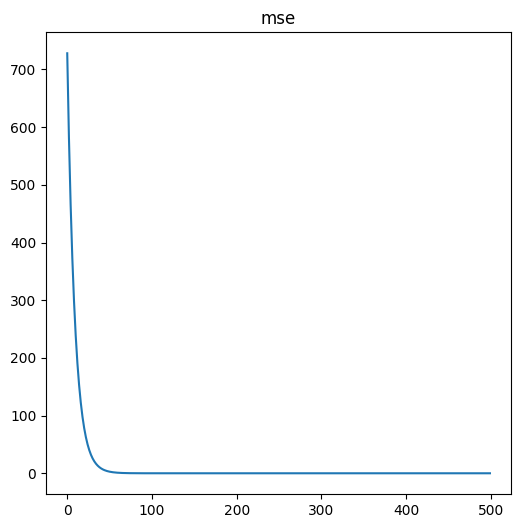

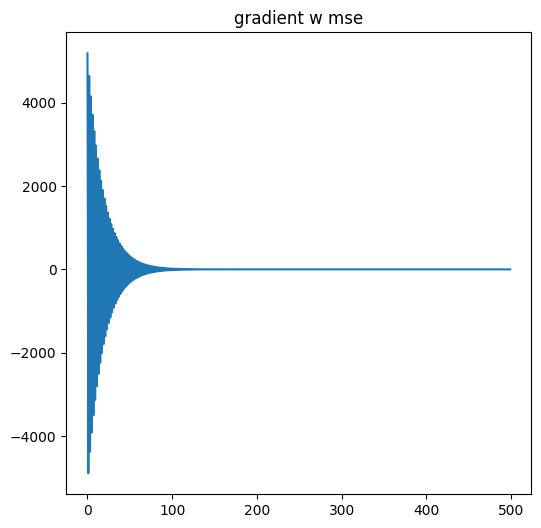

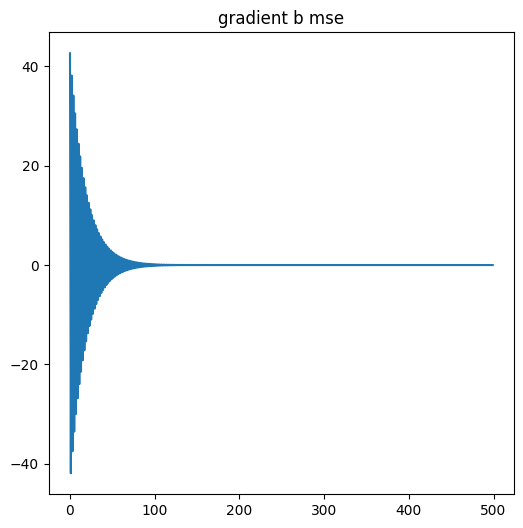

In [ ]:
# 1) градусы в радианы
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


class artificial_neuron:

    def __init__(self, weight, bias):
        self.weight = weight
        self.bias = bias
        self.mse_vals = list()
        self.gr_w_mse_vals = list()
        self.gr_b_mse_vals = list()

    def activate(self, X):
        # линейная функция активации
        # нейрон вырождается в модель линейной регрессии
        weightened_sum = X * self.weight + self.bias
        return weightened_sum

    def train(self, X, Y, w_learn_rate, b_learn_rate):
        Y_pred = self.activate(X)
        mse = np.mean((Y - Y_pred)**2)
        gr_w_mse = 2 * np.mean((Y - Y_pred) * (-X))
        gr_b_mse = 2 * np.mean((Y - Y_pred) * (-1))

        self.mse_vals.append(mse)
        self.gr_w_mse_vals.append(gr_w_mse)
        self.gr_b_mse_vals.append(gr_b_mse)

        self.weight -= w_learn_rate * gr_w_mse
        self.bias -= b_learn_rate * gr_b_mse

    def print_weights(self):
        row = [[round(self.weight, 7), round(self.bias, 7)]]
        table = tabulate(tabular_data=row,
                         headers=['WEIGHT', 'BIAS'],
                         tablefmt='orgtbl')
        print(table)


# задаем начальные веса
weight = np.random.rand()
bias = np.random.rand()

# создаем
pi = np.pi
X = np.array([0, 45, 60, 90, 180])
Y = np.array([0, pi / 4, pi / 3, pi / 2, pi])

# создаем нейрон
neuron = artificial_neuron(weight, bias)

# экспериментально выявлено
# при большем значении learning rate
# функция потерь расходится
# learning_rate = 0.000001
w_learn_rate = 0.0001
b_learn_rate = 0.08
# обучаем нейрон методом градиентного спуска
for m in range(500):
    neuron.train(X, Y, w_learn_rate, b_learn_rate)

# выводим значения весов
neuron.print_weights()

plt.figure(figsize=(6, 6))
plt.plot(np.array(neuron.mse_vals))
plt.title('mse')
plt.figure(figsize=(6, 6))
plt.plot(np.array(neuron.gr_w_mse_vals))
plt.title('gradient w mse')
plt.figure(figsize=(6, 6))
plt.title('gradient b mse')
plt.plot(np.array(neuron.gr_b_mse_vals))

# тестируем работу нейрона
rows = list()
y_pred = neuron.activate(X)
for i in range(len(X)):
    rows.append([X[i], round(y_pred[i], 7), round(Y[i], 7)])

table = tabulate(tabular_data=rows,
                 headers=['INPUT', 'OUTPUT', 'EXPECTED'],
                 tablefmt='orgtbl')
print()
print(table)

Реализация НС для перевода градусов в радианы с помощью keras

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [105]:
pi = np.pi
x = np.array([0, 45, 60, 90, 180])
y = np.array([0, pi / 4, pi / 3, pi / 2, pi])

model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.01))

In [111]:
log = model.fit(x, y, epochs=250, verbose=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[3.1415927]]
[array([[0.01745329]], dtype=float32), array([4.5323648e-11], dtype=float32)]


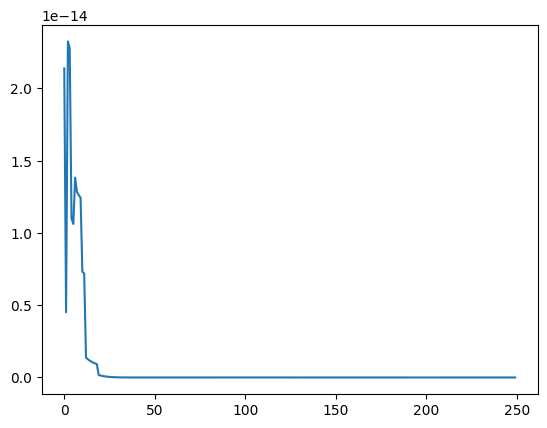

In [112]:
print(model.predict(np.array([180])))
print(model.get_weights())

plt.plot(log.history['loss'])